
#  **Model Building End-to-End Series**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section2)<br>

**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Loading data using Pandas**](#Section4)<br>

**5.** [**Seperating data into Train and Test sets**](#Section5)<br>

**6.** [**Model Building**](#Section6)<br>

**7.** [**Model Evaluation**](#Section7)<br>

---
<a name = Section2></a>
# **1. Introduction**
---


- Depending on the **data type** (qualitative or quantitative) of the **target variable** (commonly referred to as the Y variable) we are either going to be building a **classification** (if Y is qualitative) or **regression** (if Y is quantitative) model. 

- **Machine learning algorithms** could be broadly categorised to one of **three** types:
  - **Supervised learning** — is a machine learning task that establishes the mathematical relationship between input X and output Y variables. Such X, Y pair constitutes the labeled data that are used for model building in an effort to learn how to predict the output from the input.

  - **Unsupervised learning** — is a machine learning task that makes use of only the input X variables. Such X variables are unlabeled data that the learning algorithm uses in modeling the inherent structure of the data.

  - **Reinforcement learning** — is a machine learning task that decides on the next course of action and it does this by learning through trial and error in an effort to maximize the reward

---
<a name = Section2></a>
# **2. Problem Statement**
---

Due to the **boom** in the telecom industry with **4G technology**, it has become a pain in the neck for the company to **retain their customers**.


---
<a name = Section3></a>
# **3. Importing Libraries**
---


### **Importing Libraries**

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

---
<a name = Section4></a>
# **4. Loading data using Pandas**
---

In [8]:
data = pd.read_csv("ChildStatus1.csv")
data.head()

,height,weight,status
0,67,7000,4
1,65,5000,2
2,66,6000,2
3,66,6000,2
4,72,8000,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   height  1679 non-null   int64
 1   weight  1679 non-null   int64
 2   status  1679 non-null   int64
dtypes: int64(3)
memory usage: 39.5 KB


---
<a name = Section4></a>
# **5. Separating data into train and test sets**
---

<a id=section5></a>
## 5.1 Separating Independent and Dependent variables

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [23]:
X = data.drop('status', axis = 1)
y = data['status']

In [24]:
X.shape

(1679, 2)

In [25]:
y.shape

(1679,)

<a id=section5></a>
## 5.2 Splitting data into train and test set.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

---
<a name = Section6></a>
# **6. Model Building**
---

In [27]:
#Logistic Regression

log_model = LogisticRegression(max_iter=1000)
scores = cross_val_score(estimator=log_model, X=X_train, y=y_train)
print(scores)
print("Mean", scores.mean())

[0.3968254  0.41269841 0.47222222 0.46031746 0.4501992 ]
Mean 0.4384525390501485


In [28]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
scores = cross_val_score(estimator=decision_tree, X=X_train, y=y_train)
print(scores)
print("Mean", scores.mean())

[0.4484127  0.44444444 0.42857143 0.46031746 0.39840637]
Mean 0.43603048124960475


In [29]:
model_rf = RandomForestClassifier()

In [30]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
scores = cross_val_score(estimator=model_rf, X=X_train, y=y_train)
print(scores)
print("Mean", scores.mean())

[0.43253968 0.49206349 0.50793651 0.51984127 0.44223108]
Mean 0.47892240561563276


In [31]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.40714285714285714

### 6.1 CHECKING FEATURE IMPORTANCE

In [32]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [33]:
# Checking the feature importances of various features.
# Sorting the importances by descending order (lowest importance at the bottom).
for score, name in sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of weight : 58.665413504896705 %
Feature importance of height : 41.334586495103295 %


In [34]:
model_rf.feature_importances_*100

array([41.3345865, 58.6654135])

Text(0.5, 1.0, 'Feature Importance of each Feature')

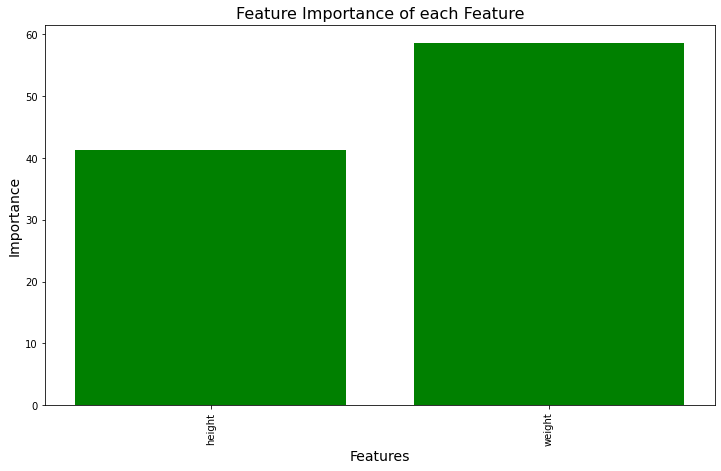

In [35]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(X_train.columns, model_rf.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

### 6.2 HYPERPARAMETER TUNING

In [36]:
param_grid = [{'n_estimators': [100, 200, 300],
               'max_depth': [None, 2, 3, 10, 20],
               'max_features': ['auto', 2, 4, 8, 16, 'log2', None]}]

In [37]:
temp_rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [38]:
grid_search = GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

In [41]:
#%%time
#grid_search.fit(X_train, y_train)

In [43]:
# Calculating the best RMSE score found by Grid Search 
#grid_search.best_score_

In [45]:
#grid_search.best_params_

### **6.3 FINAL MODEL**

In [46]:
# Creating the final random forest model from the grid search's best estimator.
final_rf = grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [24]:
# Fitting the final model with training set
#final_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=300, n_jobs=-1, random_state=0)

In [25]:
# Making predictions on the train set
#y_train_pred = final_rf.predict(X_train)

In [26]:
# Making predictions on the test set
#y_test_pred = final_rf.predict(X_test)

###  **Saving the model as Pickle String**

In [47]:
import pickle

In [48]:
pickle.dump(model_rf, open("randomforest.pkl","wb"))

---
<a name = Section7></a>
# **7. Model Evaluation**
---

### **CONFUSION MATRIX**

In [50]:
#confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_test))

In [52]:
#confusion_mat.index = ['Actual Negative', 'Actual Positive']
#confusion_mat.columns = ['Predicted Negative', 'Predicted Positive']
#confusion_mat

### **ACCURACY SCORE**

In [31]:
# Accuracy score on the training set.
print('Accuracy score for train data is:', accuracy_score(y_train, y_train_pred))

Accuracy score for train data is: 0.7881035026822342


In [32]:
# Accuracy score on the test set.
print('Accuracy score for test data is:', accuracy_score(y_test, y_test_pred))

Accuracy score for test data is: 0.7886524822695036


### **Precision Score**

In [33]:
# Precision score on the training set.
print('Accuracy score for train data is:', precision_score(y_train, y_train_pred))

Accuracy score for train data is: 0.7169117647058824


In [34]:
# Precision score on the test set.
print('Accuracy score for test data is:', precision_score(y_test, y_test_pred))

Accuracy score for test data is: 0.6455696202531646


### **Recall Score**

In [35]:
# recall score on the training set.
print('Accuracy score for train data is:', recall_score(y_train, y_train_pred))

Accuracy score for train data is: 0.3447259870359458


In [36]:
# recall score on the test set.
print('Accuracy score for test data is:', recall_score(y_test, y_test_pred))

Accuracy score for test data is: 0.29651162790697677
